In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# MAIN DIRECTORIES

base_dir = '/Users/saramajeed/Documents/UNI/Year 3/Project/data/puzzle_3x3/'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [3]:
#https://github.com/shivaverma/Jigsaw-Solver/blob/master/utills.py

def extract_piece(a):

    """
       extracts each piece of the puzzle and returns
    """

    #size//cuts
    cut_len = 200 // 3 

    a = np.array([a[:, 0:cut_len, :], a[:, cut_len:cut_len * 2, :], a[:, cut_len * 2:cut_len * 3, :]])
    a = np.concatenate(
        (a[:, 0:cut_len, :, :], a[:, cut_len:cut_len * 2, :, :], a[:, cut_len * 2:cut_len * 3, :, :]))

    return a

In [4]:
#https://www.tensorflow.org/tutorials/load_data/images

def load_data(path):
    
    image_data = tf.keras.preprocessing.image_dataset_from_directory( 
        directory = path,
        batch_size = 50, 
        shuffle = True,
        image_size = (200,200)
    )
    
    tiles = []
    
    for images, labels in image_data:
        for i in range(len(images)):
            im = images[i]
            tiles.append(extract_piece(im))
            
            
    return tiles

In [5]:
#https://github.com/keras-team/keras/issues/8195

def reduce_dimensions( x4d ) :
    shape = tf.shape( x4d ) # get dynamic tensor shape
    x3d = tf.reshape( x4d, [shape[0]* shape[1], shape[2], shape[3] ] )
    return x3d

In [6]:
train_data = load_data(train_dir)
#test_data = load_data(test_dir)
#valid_data = load_data(valid_dir)

Found 38762 files belonging to 1 classes.


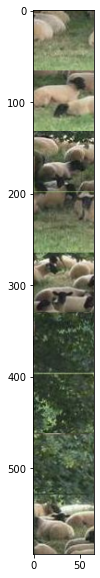

In [10]:
plt.figure(figsize=(20,10))
new_data = reduce_dimensions(train_data[655])

plt.imshow(np.array(new_data).astype('uint16'))